I will use the data collected and stored in the csv file to perform the analysis process.

In [1]:
import json
from pathlib import Path
from copy import deepcopy
from datetime import datetime
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

In [2]:
# Read the csv file
movies = pd.read_csv("movie_dataset_3.csv")

### Date Processing 

In [3]:
# Delete the movies that has not been released
movies = movies[movies['status'] == "Released"]

# Choose useful columns
movies = movies[['original_title',  'release_date', 'genres', 'production_companies', 'production_countries', 'revenue','budget', 'runtime', 'vote_average']]
movies.isnull().sum() 
# The result shows there are 24 movies records without a release date.
# Since it's a tiny proportion in nearly 5000 samples, I just drop these rows.
movies = movies.dropna()

# Add a feature "profit"
movies['profit'] = movies['revenue'] - movies['budget']

# The data in the column of release_date is stored as object, so I change it to time series.
movies.loc[:, 'release_date'] = pd.to_datetime(movies.loc[:, 'release_date'])
# I will analyse movie data in different years, so I delete the information of specific date.
movies.loc[:, 'release_year'] = movies.loc[:, 'release_date'].dt.year
# remove release_date column
movies = movies.drop(columns='release_date')
movies

,original_title,genres,production_companies,production_countries,revenue,budget,runtime,vote_average,profit,release_year
0,Terrifier 2,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[{'id': 15157, 'logo_path': None, 'name': 'Blo...","[{'iso_3166_1': 'US', 'name': 'United States o...",10155347,250000,138,7.100,9905347,2022
1,Black Adam,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...","[{'id': 12, 'logo_path': '/iaYpEp3LQmb8AfAtmTv...","[{'iso_3166_1': 'US', 'name': 'United States o...",319000000,200000000,125,6.800,119000000,2022
2,MexZombies,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...","[{'id': 84651, 'logo_path': None, 'name': 'Dra...","[{'iso_3166_1': 'MX', 'name': 'Mexico'}]",0,0,93,7.473,0,2022
3,Im Westen nichts Neues,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[{'id': 36616, 'logo_path': '/ujmuIln4o5ZK08Nv...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",0,0,147,7.913,0,2022
4,Blade of the 47 Ronin,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...","[{'id': 17009, 'logo_path': '/ssowAxOrrqsSR2CK...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,0,106,6.720,0,2022
...,...,...,...,...,...,...,...,...,...,...
9975,Ladyhawke,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...","[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...","[{'iso_3166_1': 'US', 'name': 'United States o...",18432000,20000000,121,7.045,-1568000,1985
9976,David Attenborough: A Life on Our Planet,"[{'id': 99, 'name': 'Documentary'}]","[{'id': 10066, 'logo_path': '/reyIdDf4M6BNii26...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0,0,83,8.502,0,2020
9977,Choses secrètes,"[{'id': 18, 'name': 'Drama'}]","[{'id': 310, 'logo_path': '/4Gp5A4YdjPBfsHT47n...","[{'iso_3166_1': 'FR', 'name': 'France'}]",105090,0,115,5.708,105090,2002
9978,Lucas,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...","[{'iso_3166_1': 'US', 'name': 'United States o...",8200000,6000000,108,6.630,2200000,1986


Store the processed data into a csv file

In [4]:
movies.to_csv("processed_movies.csv", index='id')
processed_movies = pd.read_csv("processed_movies.csv")

### Data Analysis &  Visualization

#### 1. I will analyse the development of movie industry according to the number of released movies, budget, revenue and profit each year.

In [5]:
# Group movies by year
processed_movies.loc[:, 'total_numbers'] = 1
movies_each_year = processed_movies.groupby('release_year').agg(total_numbers_a_year=('total_numbers','sum'),
                       year_revenue=('revenue', 'sum'),
                       year_budget =('budget', 'sum'),
                        year_profit =('profit', 'sum'))
movies_each_year

,total_numbers_a_year,year_revenue,year_budget,year_profit
release_year,,,,
1902,1,0,5985,-5985
1918,1,0,0,0
1920,1,8811,18000,-9189
1921,1,2500000,250000,2250000
1922,2,19054,220000,-200946
...,...,...,...,...
2018,506,28875064744,8051499578,20823565166
2019,509,28992674278,7954126305,21038547973
2020,466,4709585181,3194667992,1514917189


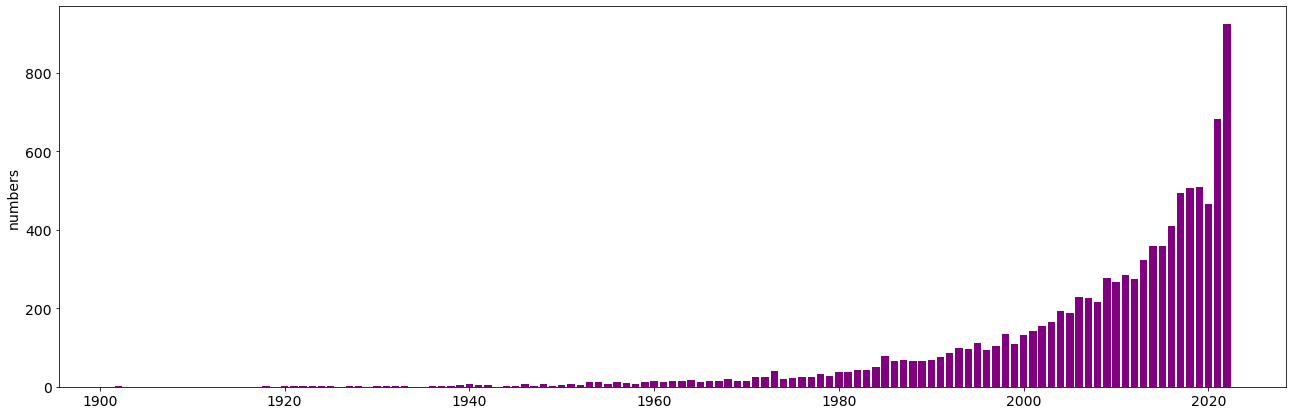

In [6]:
# Set the figure
fig_no = plt.figure(figsize=(22,7))
# set up the bar chart
x = movies_each_year.index
y = movies_each_year['total_numbers_a_year']
plt.bar(x, y, color="purple")
plt.ylabel("numbers", fontsize=14)
# increase the font sizes on the axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
plt.title = 'Movies released every year'

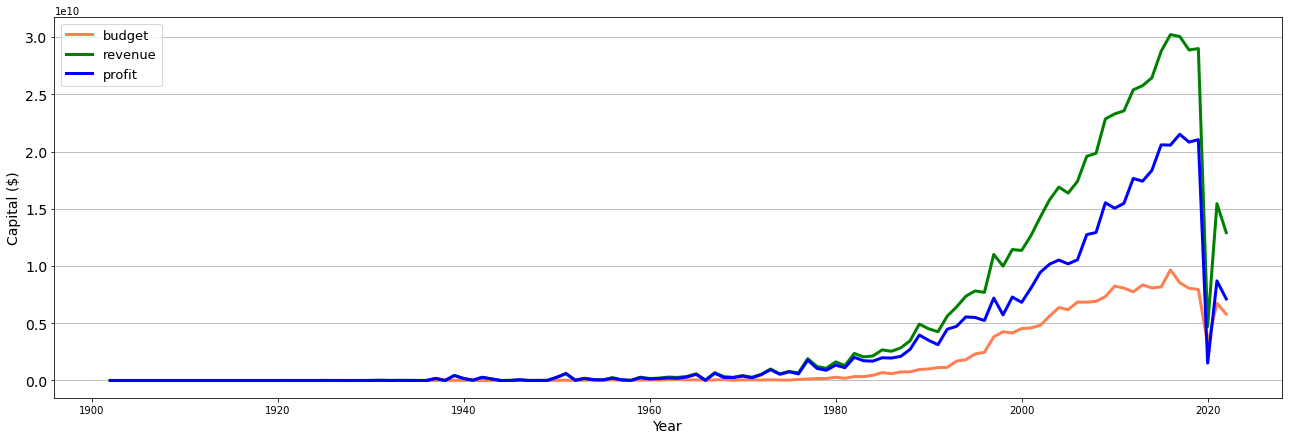

In [7]:
# create a new figure, setting the dimensions of the plot
plt.figure(figsize=(22,7))
# set the line colour and increase the line thickness
p = plt.plot(x, movies_each_year['year_budget'], color="coral", linewidth=3)
p = plt.plot(x, movies_each_year['year_revenue'], color="green", linewidth=3)
p = plt.plot(x, movies_each_year['year_profit'], color="blue", linewidth=3)
# add the y-grid lines
plt.grid(axis="y")
# set the axis labels, with the specified font size
plt.xlabel('Year', fontsize=14)
plt.ylabel('Capital ($)', fontsize=14)
# add a legend
plt.legend(["budget","revenue","profit"], fontsize=13)
plt.yticks(fontsize=14);
# set the plot title, with the specified font size
plt.title = 'Capital of Movies'

The two graphs demonstrate the development of the movie industry.
From the bar chart above, it is clear that the total number of movie released every year shows a sharp upward trend after the year of 2000. In 2020, probably because of covid-19 pandemic, it declined considerably but rebound back the next year dramatically.
As it is displayed in the line graph, the investment and return increase steadily and so does the profit. The lack of data might explain why the three lines plummet in 2020.   

#### 2. How do the movie genres change over years?

In [8]:
all_movie_genres = set()

# Get all movie genres
genres_list = []
for item in processed_movies[ 'genres']:
    single_movie_genres = eval(item)
    for genre in single_movie_genres:
        all_movie_genres.add(genre['name'])

# Transform the set to list
all_movie_genres = list(all_movie_genres)

# Copy the movie data and add columns for genres
movie_genres_data = deepcopy(processed_movies)
for column in all_movie_genres:
    movie_genres_data.loc[:, column] = 0
    mask = movie_genres_data.loc[:, 'genres'].str.contains(column)
    movie_genres_data.loc[mask, column] = 1
movie_genres_data


,Unnamed: 0,original_title,genres,production_companies,production_countries,revenue,budget,runtime,vote_average,profit,...,Horror,Drama,Adventure,Crime,Music,TV Movie,Comedy,Fantasy,War,Animation
0,0,Terrifier 2,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[{'id': 15157, 'logo_path': None, 'name': 'Blo...","[{'iso_3166_1': 'US', 'name': 'United States o...",10155347,250000,138,7.100,9905347,...,1,0,0,0,0,0,0,0,0,0
1,1,Black Adam,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...","[{'id': 12, 'logo_path': '/iaYpEp3LQmb8AfAtmTv...","[{'iso_3166_1': 'US', 'name': 'United States o...",319000000,200000000,125,6.800,119000000,...,0,0,0,0,0,0,0,1,0,0
2,2,MexZombies,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...","[{'id': 84651, 'logo_path': None, 'name': 'Dra...","[{'iso_3166_1': 'MX', 'name': 'Mexico'}]",0,0,93,7.473,0,...,1,0,0,0,0,0,1,0,0,0
3,3,Im Westen nichts Neues,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[{'id': 36616, 'logo_path': '/ujmuIln4o5ZK08Nv...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",0,0,147,7.913,0,...,0,1,0,0,0,0,0,0,1,0
4,4,Blade of the 47 Ronin,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...","[{'id': 17009, 'logo_path': '/ssowAxOrrqsSR2CK...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,0,106,6.720,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,9975,Ladyhawke,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...","[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...","[{'iso_3166_1': 'US', 'name': 'United States o...",18432000,20000000,121,7.045,-1568000,...,0,1,1,0,0,0,1,1,0,0
9885,9976,David Attenborough: A Life on Our Planet,"[{'id': 99, 'name': 'Documentary'}]","[{'id': 10066, 'logo_path': '/reyIdDf4M6BNii26...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0,0,83,8.502,0,...,0,0,0,0,0,0,0,0,0,0
9886,9977,Choses secrètes,"[{'id': 18, 'name': 'Drama'}]","[{'id': 310, 'logo_path': '/4Gp5A4YdjPBfsHT47n...","[{'iso_3166_1': 'FR', 'name': 'France'}]",105090,0,115,5.708,105090,...,0,1,0,0,0,0,0,0,0,0
9887,9978,Lucas,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...","[{'iso_3166_1': 'US', 'name': 'United States o...",8200000,6000000,108,6.630,2200000,...,0,1,0,0,0,0,1,0,0,0


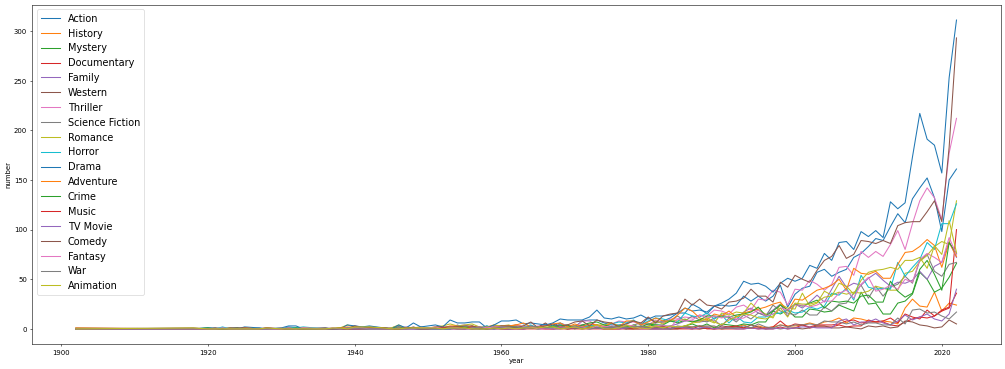

In [9]:
# Group movie genres by year
genres_by_year = movie_genres_data.groupby(by='release_year')[all_movie_genres].sum()
# Set the figure
plt.figure(figsize=(25, 9), dpi=50)

x = genres_by_year.index
for genres in genres_by_year.columns:
    y = genres_by_year[genres]
    plt.plot(x, y)

plt.legend(genres_by_year.columns, fontsize=14)
plt.ylabel('number')
plt.xlabel('year')
plt.title = "Movie Genres of Years"


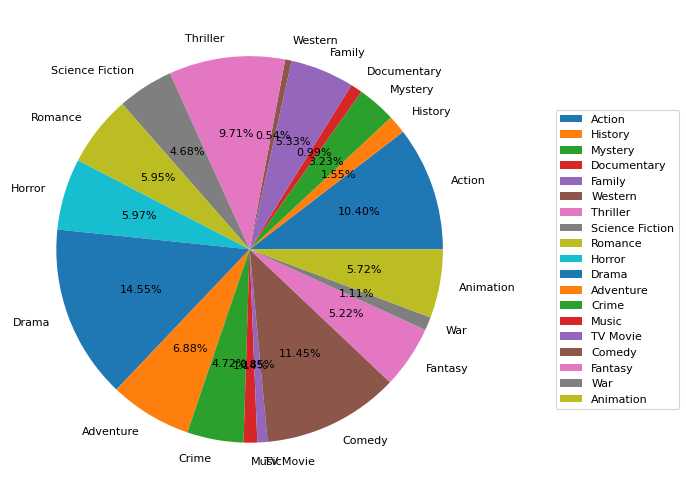

In [10]:
#Drew a pie chart of different movie genres
genres_sum = movie_genres_data[all_movie_genres].sum()

plt.figure(figsize=(16, 8), dpi=80)
plt.pie(genres_sum, labels=genres_sum.index, autopct="%1.2f%%")
plt.legend(bbox_to_anchor=(1.4, 0.8))
plt.title = "Proportion of movie genres"

The above graphs illustrate that as time goes by, all the movie types shows an overall uptrend especially after 1992 while drama, comedy, thriller and action show the most significant increase which are the most popular types of films till now. 

#### 3. The relationship between movie genre and profit

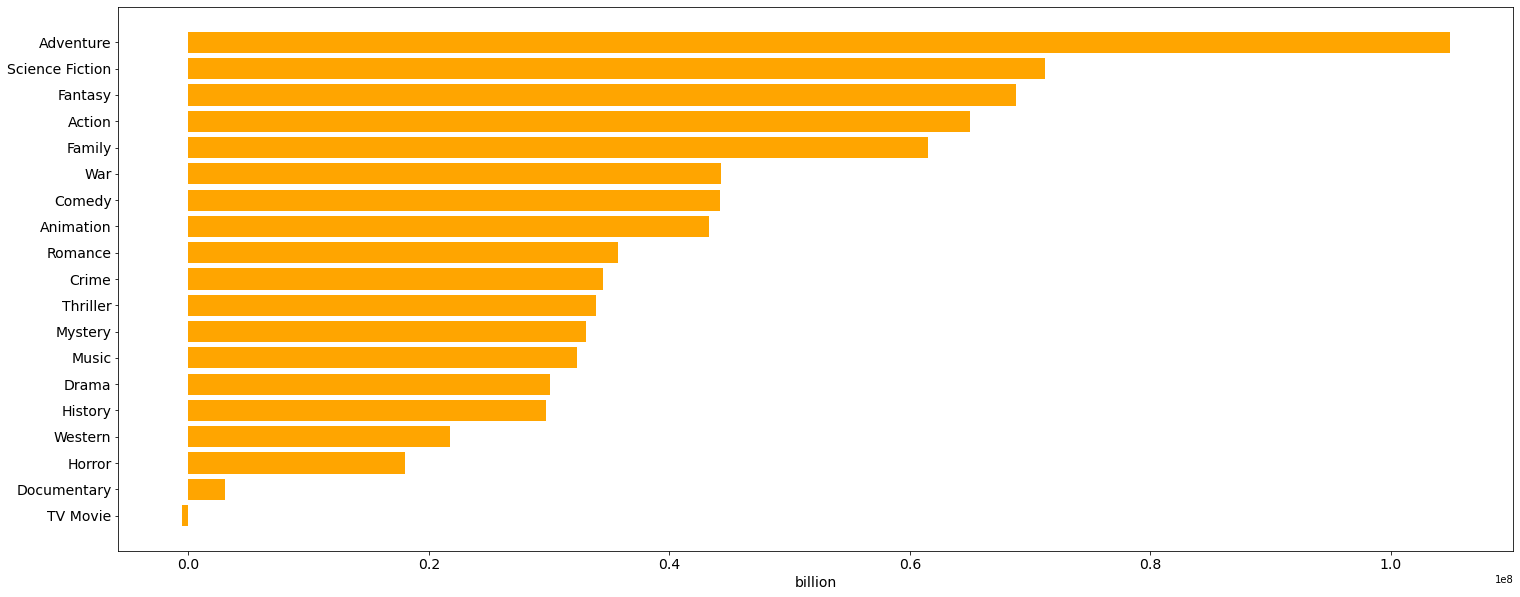

In [11]:
# Use a list to store the average profit of different genres
genre_profit = []
# Iterate all the genres and it to the list
for column in all_movie_genres:
    mask = movie_genres_data.loc[:, column] == 1
    mean_profit = movie_genres_data.loc[mask, 'profit'].mean()
    genre_profit.append(mean_profit)

genre_profit_series = pd.Series(data=genre_profit,index=all_movie_genres).sort_values()

# Set the figure
plt.figure(figsize=(25, 10))
y_pos = range(len(genre_profit_series.index))
plt.title = "Profit of Movie Genres"
plt.barh(y_pos, genre_profit_series, align='center', color="orange")
# specify the y-axis labels and their position
plt.yticks(y_pos, genre_profit_series.index, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("billion", fontsize=14);

As it is demonstrated in the above bar chart, types of family, action, fantasy, sci-fi and adventure provide the most return of investment while among these five genres, adventure movies has a noticable advantage over others in terms of economic factors.

#### 4. The relationship between runtime and vote.

(0.0, 300.0, 0.0, 10.0)

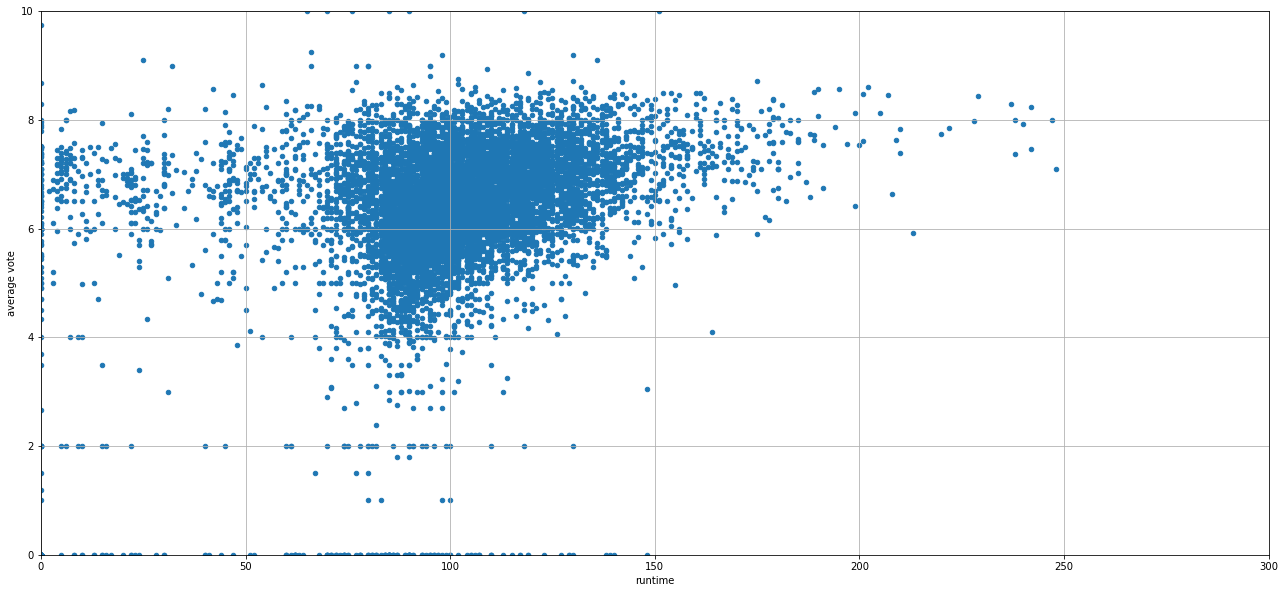

In [12]:
movies.plot.scatter(x = 'runtime', y = 'vote_average', figsize = (22,10))
plt.xlabel("runtime")
plt.ylabel('average vote')
plt.title = "Relationship between runtime & vote"
plt.grid(True)
plt.axis([0,300,0,10])

The scatter plot illustrates that most highly-voted movies run 80~150 minutes.

#### 5. The relationship between vote and revenue 

(0.0, 500000000.0, 0.0, 10.0)

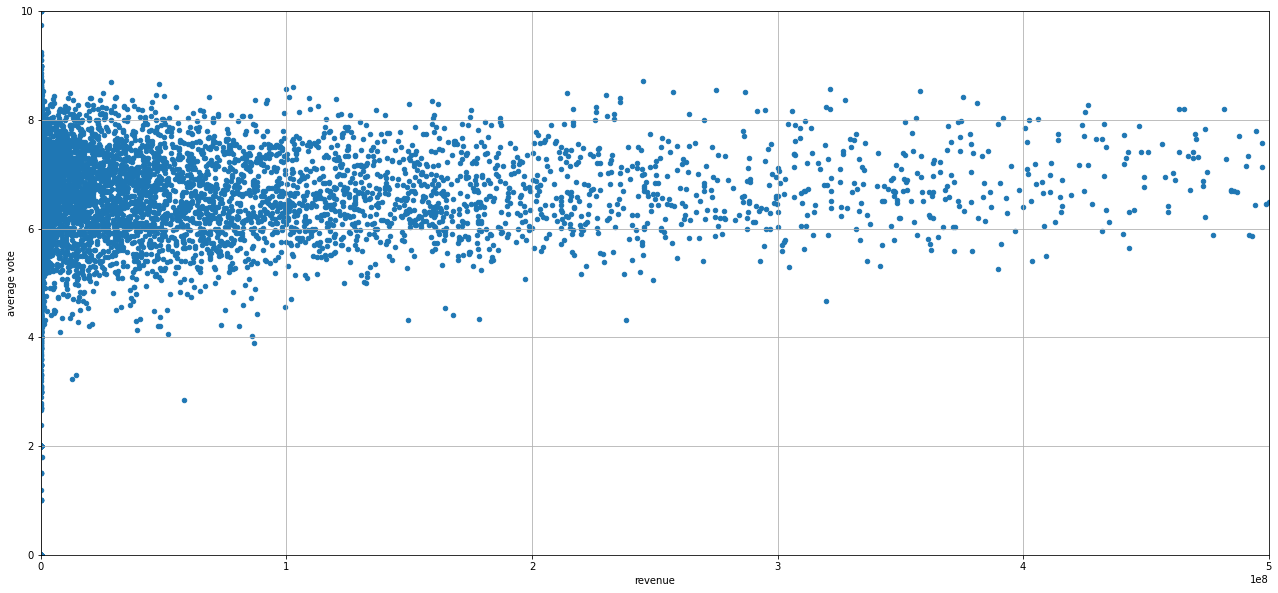

In [16]:
movies.plot.scatter(x = 'revenue', y = 'vote_average', figsize = (22,10))
plt.xlabel("revenue")
plt.ylabel('average vote')
plt.title = "Relationship between revenue & vote"
plt.grid(True)
plt.axis([0,500000000,0,10])

As we can see from this scatter plot, revenue of movies is weakly associated with vote.

#### 6. The analysis of production countries.

In [275]:
movie_countries_data = deepcopy(processed_movies)
countries = set()
for item in movie_countries_data[ 'production_countries']:
    countries_object = eval(item)
    for country in countries_object:
        countries.add(country['name'])

# Transform the set to list
countries = list(countries)

for country in countries:
    movie_countries_data[country] = movie_countries_data['production_countries'].str.contains(country).apply(lambda x:1 if x else 0)
product_country = movie_countries_data.loc[:, countries]
product_country.index = movie_countries_data['release_year']
product_count = product_country.sort_index(ascending=False).sum().sort_values(ascending=False)
counts = product_count[product_count > 10]

C:\Users\92043\AppData\Local\Temp\ipykernel_26996\1380205100.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movie_countries_data[country] = movie_countries_data['production_countries'].str.contains(country).apply(lambda x:1 if x else 0)
C:\Users\92043\AppData\Local\Temp\ipykernel_26996\1380205100.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movie_countries_data[country] = movie_countries_data['production_countries'].str.contains(country).apply(lambda x:1 if x else 0)
C:\Users\92043\AppData\Local\Temp\ipykernel_2699

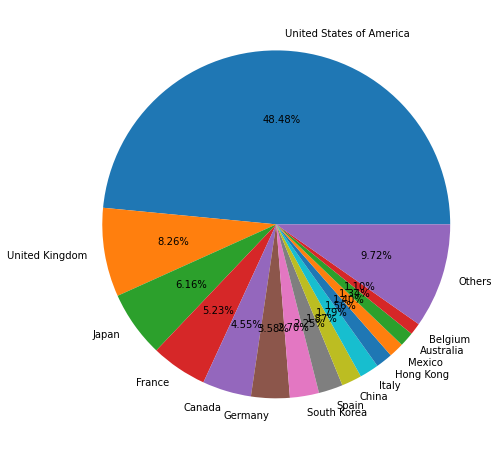

In [278]:
#Drew a pie chart of different production countries
countries_proportion = counts/product_count.sum()
others = 0.01
col = countries_proportion[countries_proportion >= others]
col['Others'] = countries_proportion[countries_proportion < others].sum()
col.plot.pie(autopct="%1.2f%%", figsize=(16, 8), label='')
plt.title = "Proportion of production countries"

It is clear from the above pie chart that the United States is the most productive place of movies. Apart from that, western European and eastern Asian countries play the dominant roles in the movie industry.

### Conclusions 

Generally speaking, the movie industry has been emerging since 1980s and developing very fast during the past 20 years.The investment and profit keep growing which indicates a bright prospect.<br /> 
Statistics also suggests that audiences prefer movies of action, comedy, drama and thriller while the types of adventure,sci-fi and action are more likely to guarantee a high profit.<br /> 
The majority of released movies are produced in North America, Western Europe and Eastern Asia. Further analysis could focus on workers in the industries related to movies including editting, filming, dubbing, etc. in different countries as it would reveal how movie industry facilitate local economy.<br /> 
Future research could also be extended to the relationship between profit and segmented investment in different phase such as shooting, cast & crew, promoting, etc.